# **Simple Linear Regression**

Revelant Imports

In [ ]:
#Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
#Mounting Google Colab to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
penguins = pd.read_csv("/content/drive/MyDrive/Data Analysis/Simple Linear Regression/penguins.csv")
# Examine first 5 rows of dataset
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Data Cleaning**

In this analysis, we will only focus on the Adelie and Gentoo penguins so we need to keep them and drop any missing values from the dataset.

In [ ]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

The *dropna()* function removes any rows with any missing values in any of the columns. The *reset_index()* function resets the index values for the rows in the dataframe. Typically, you use *reset_index()* after you've finished manipulating the dataset. By setting *inplace=True*, you will not create a new DataFrame object. By setting *drop=True*, you will not insert a new index column into the DataFrame object.

#**Explolatory Data Analysis**

Our focus is on simple linear regression, we are therefore looking for any linear relationships among the variables in our "penguins_final" data frame. We will use the "pairplot" function in seaborn to visualise the relationships.

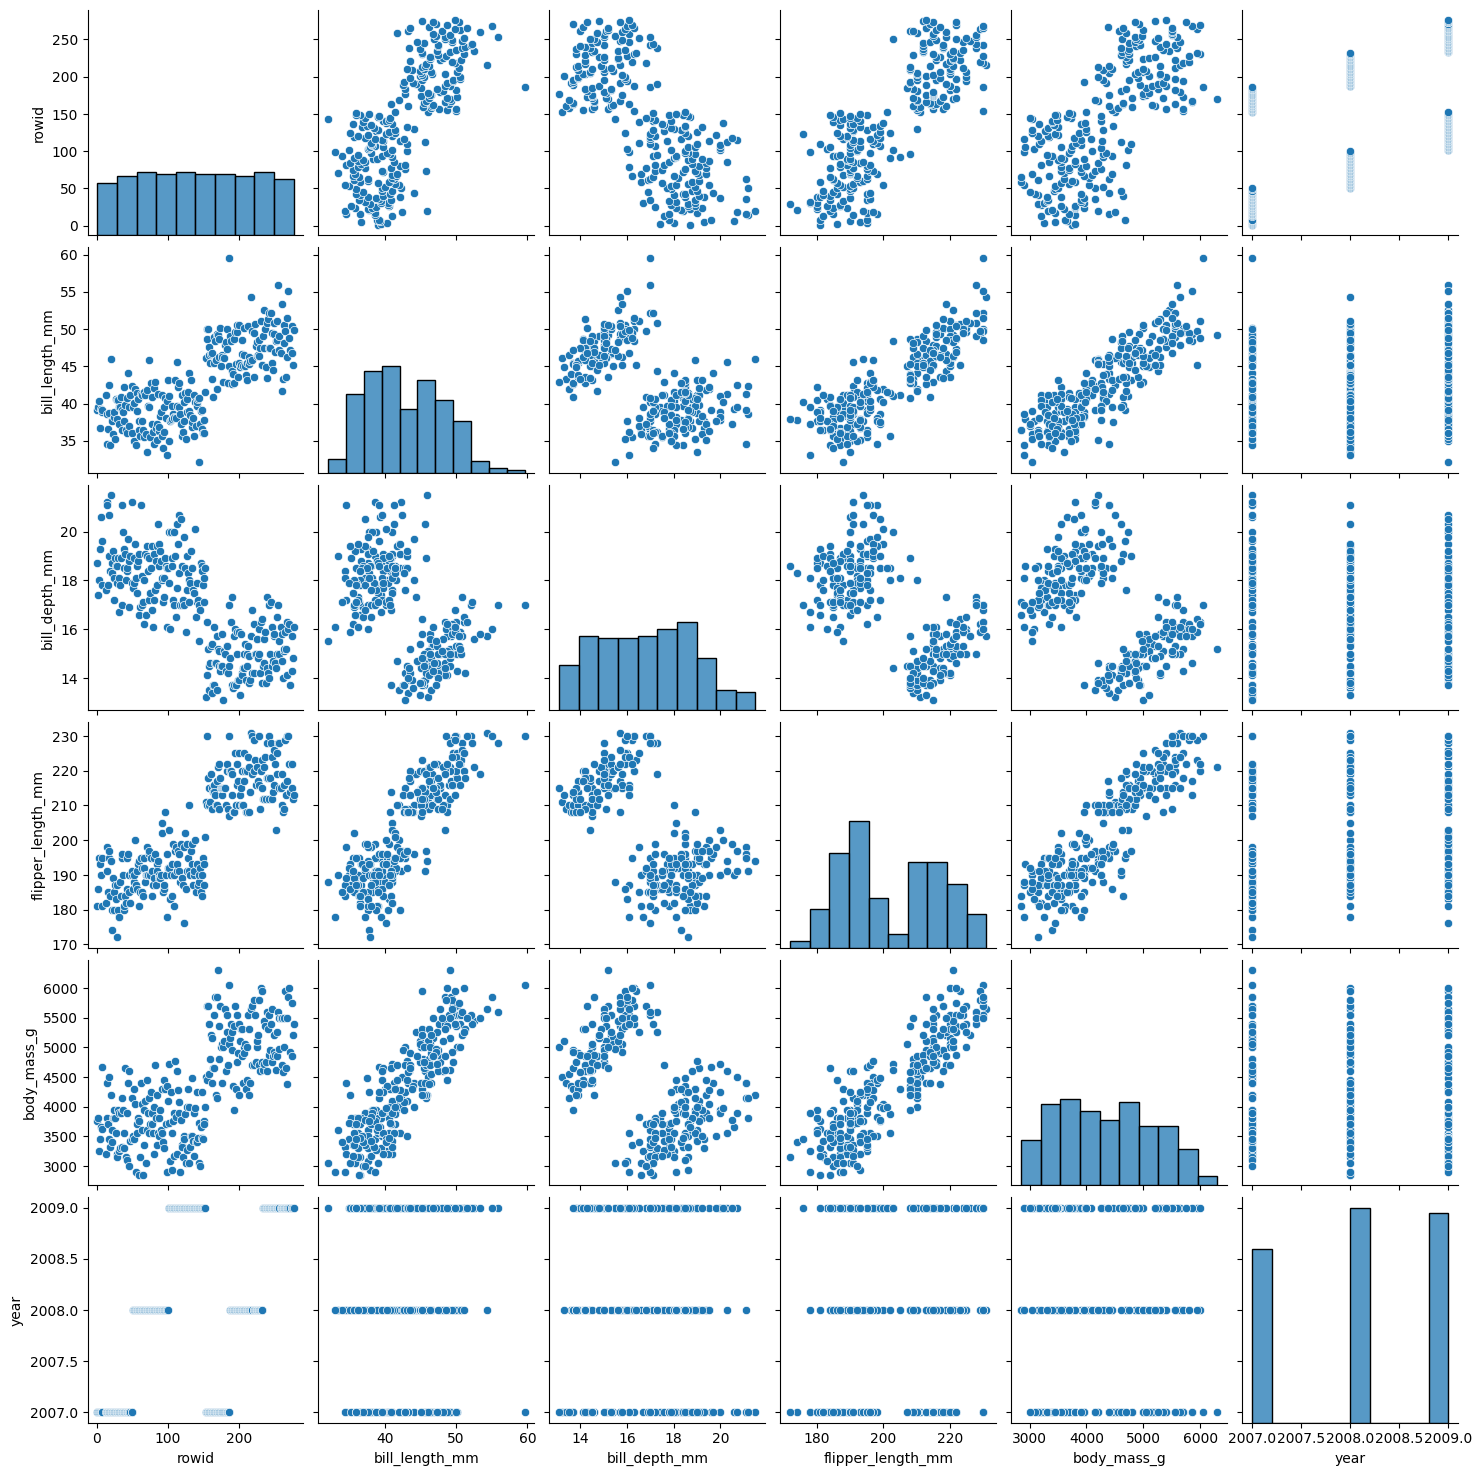

In [ ]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:



*   bill length (mm) and flipper length (mm)
*   bill length (mm) and body mass (g)
*   flipper length (mm) and body mass (g)





# **Model Construction**

From the the scatter plots above, we could run a simple linear regression on any of them but wea re going to focus on the relationship between bill length (mm) and body (g).


We will subset the columns of our interest, bill length (mm) and body (g).

In [ ]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

We will construct the linear regression and save it as a string. It is important to note that the dependent variable (y) comes before the ~, and the independent variables (x) come after the ~.

In [ ]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

We will then use the `ols()` function to build the simple linear regression model in `statsmodels`

In [ ]:
#import the ols function
from statsmodels.formula.api import ols

We proceed to plug in the `ols_formula` and the `old_data` as arguments in the `ols()` function and save the results as variable called "OLS". We need to fit the model into the data using the `fit()` function.

In [ ]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, we will call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` helps us to evaluate the model and interpret the results.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.33e-85
Time:                        15:52:21   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to visualise the regression line using Plotly

In [ ]:
# Create a scatter plot with regression line using Plotly Express
fig = px.scatter(ols_data,
                 x="bill_length_mm",
                 y="body_mass_g",
                 height = 500,
                 width= 900,
                 title="Scatter Plot with Regression Line",
                 trendline="ols")

fig.show()

# **Check the Model Assumptions**

In a simple linear regression, there are four assumptions that must be sutisfied:


1.   Linearity
2.   Normality
3.   Independent observations
4.   Homoscedasticity

We  have already checked the linearity by plotting the scatter plot matrix. The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, we can only check these assumptions after we have constructed the model. To check these assumptions, we will check the residuals, as an approximation of the errors.


To easily check the model assumptions and create relevant visualuzations, we need to subset the X variable by isolating the `bill_length_mm` column only and save the predicted values using the `model.predict(x)` function.

In [ ]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

We will the proceed to save the model residual as a variable by using the `model.resid` attribute.

In [ ]:
# Calculate residuals
residuals = model.resid

# **Check the normaloty assumption**

Plotting a histogram will help us check the normality assumption. We will use the `px.histogram()` function in plotly.

In [ ]:
# Create a histogram of residuals using Plotly Express
fig = px.histogram(residuals,
                   width = 1000,
                   title="Histogram of Residuals")

fig.show()

From the above histogram, it is noticeable that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. If the residuals are normally distributed, we would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot.  create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

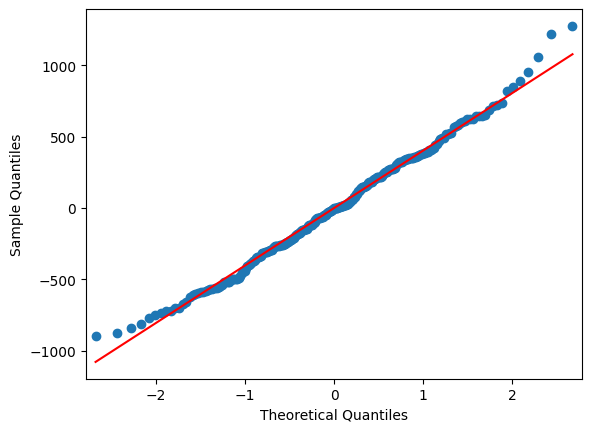

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

# **Check for homoscedasticity assumption**

To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

In [ ]:
fig = px.scatter(x = fitted_values,
                 y = residuals,
                 width = 1000,
                 labels = {"x" :"Fitted Values", "y" : "Residuals"})


# Add a reference line at residuals = 0
fig.add_hline(y=0,
              line_dash="solid",
              line_color="blue")

fig.show()